In [1]:
!pip install opendatasets
!pip install pandas

In [2]:
import opendatasets as od
import pandas

In [3]:
od.download('https://www.kaggle.com/datasets/ismailnasri20/driver-drowsiness-dataset-ddd')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vishwamgupta0810
Your Kaggle Key: ··········


100%|██████████| 2.58G/2.58G [00:30<00:00, 92.0MB/s]


In [4]:
!pip install keras-cv keras-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 19.7 MB/s eta 0:00:00


In [5]:
import json
import math
import keras_cv
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
from keras import losses
import numpy as np
from keras import metrics
import matplotlib.pyplot as plt
import os

Using TensorFlow backend


In [6]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)',
    image_size=(224, 224),
    validation_split=0.3,
    subset='both',
    seed=123,
)

Found 41793 files belonging to 2 classes.
Using 29256 files for training.
Using 12537 files for validation.


In [7]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

(32, 224, 224, 3)


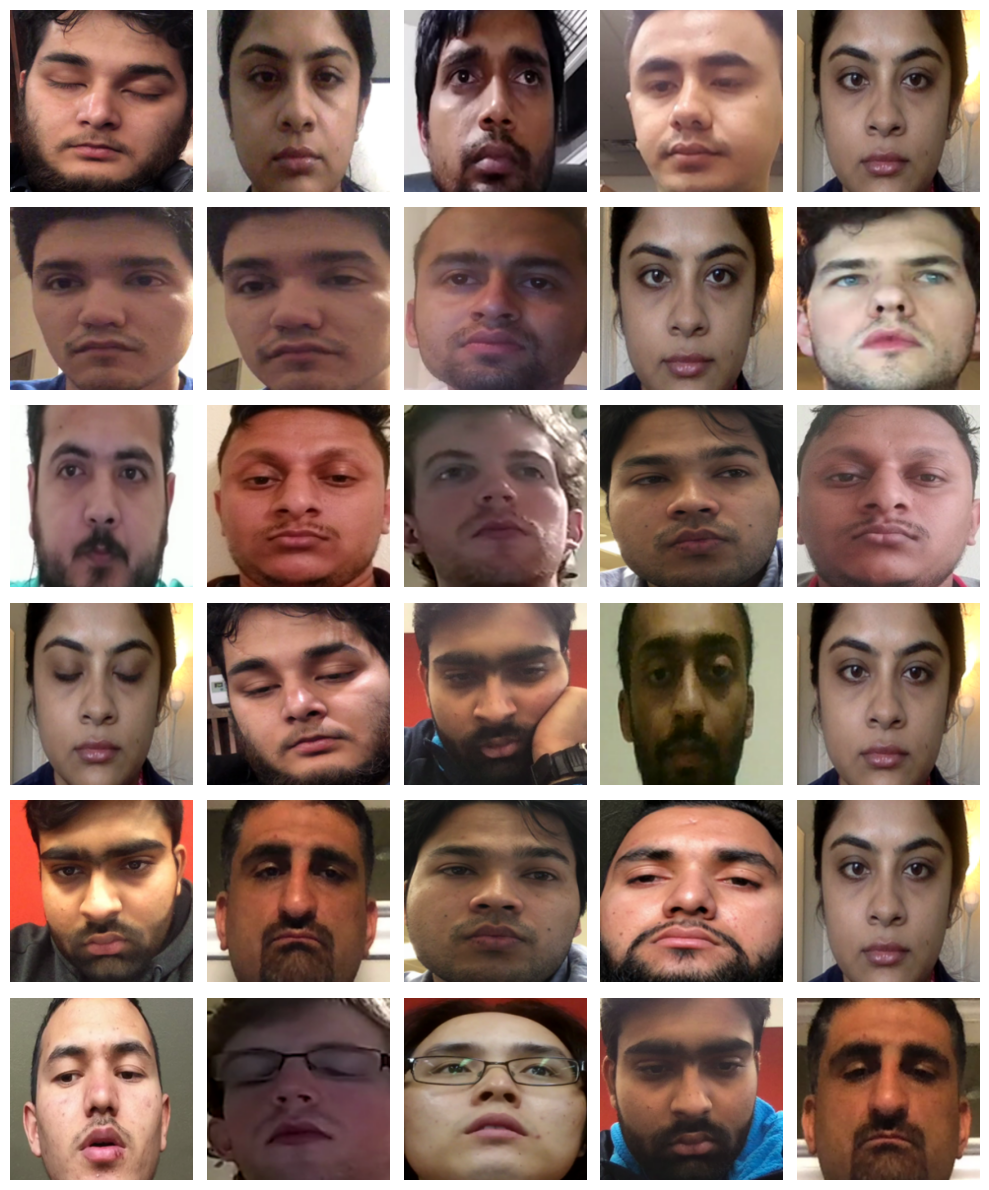

In [8]:
images = next(iter(train_ds.take(1)))[0]
print(images.shape)
keras_cv.visualization.plot_image_gallery(images, value_range=(0, 255))

In [9]:
model = keras_cv.models.ImageClassifier.from_preset(
    "efficientnetv2_b0_imagenet", num_classes=2
)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)

100%|██████████| 1.79k/1.79k [00:00<00:00, 1.38MB/s]
100%|██████████| 23.1M/23.1M [00:00<00:00, 41.9MB/s]
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids


In [10]:
r = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
)

Epoch 1/10
915/915 [==============================] - 253s 241ms/step - loss: 0.4410 - accuracy: 0.8574 - val_loss: 0.1569 - val_accuracy: 0.9843
Epoch 2/10
915/915 [==============================] - 223s 243ms/step - loss: 0.1146 - accuracy: 0.9786 - val_loss: 0.0271 - val_accuracy: 0.9974
Epoch 3/10
915/915 [==============================] - 214s 233ms/step - loss: 0.0440 - accuracy: 0.9910 - val_loss: 0.0173 - val_accuracy: 0.9966
Epoch 4/10
915/915 [==============================] - 213s 233ms/step - loss: 0.0257 - accuracy: 0.9945 - val_loss: 0.0075 - val_accuracy: 0.9986
Epoch 5/10
915/915 [==============================] - 222s 242ms/step - loss: 0.0178 - accuracy: 0.9963 - val_loss: 0.0044 - val_accuracy: 0.9988
Epoch 6/10
915/915 [==============================] - 221s 241ms/step - loss: 0.0152 - accuracy: 0.9968 - val_loss: 0.0036 - val_accuracy: 0.9990
Epoch 7/10
915/915 [==============================] - 214s 233ms/step - loss: 0.0120 - accuracy: 0.9973 - val_loss: 0.0027 -

In [11]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

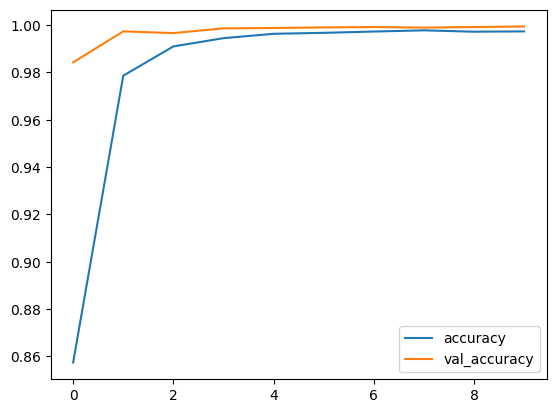

In [12]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();

In [13]:
cd '/content/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Drowsy'

/content/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Drowsy


In [14]:
!ls

A0001.png  E0247.png  I0499.png  L0773.png  O0470.png  S0132.png  W0101.png  X1430.png	 ZB0434.png
A0002.png  E0248.png  I0500.png  L0774.png  O0471.png  S0133.png  W0102.png  X1431.png	 ZB0435.png
A0003.png  E0249.png  I0501.png  L0778.png  O0472.png  S0134.png  W0103.png  X1432.png	 ZB0436.png
A0004.png  E0250.png  I0502.png  L0779.png  O0473.png  S0135.png  W0104.png  X1433.png	 ZB0437.png
A0005.png  E0251.png  I0503.png  L0780.png  O0474.png  S0136.png  W0105.png  X1434.png	 ZB0438.png
A0006.png  E0252.png  I0504.png  L0781.png  O0475.png  S0137.png  W0106.png  X1435.png	 ZB0439.png
A0007.png  E0253.png  I0505.png  L0790.png  O0476.png  S0138.png  W0107.png  X1436.png	 ZB0440.png
A0008.png  E0254.png  I0506.png  L0791.png  O0477.png  S0139.png  W0108.png  X1437.png	 ZB0441.png
A0009.png  E0255.png  I0507.png  L0792.png  O0478.png  S0140.png  W0109.png  X1438.png	 ZB0442.png
A0010.png  E0256.png  I0508.png  L0793.png  O0479.png  S0141.png  W0110.png  X1439.png	 ZB0443.png
A0011.png 

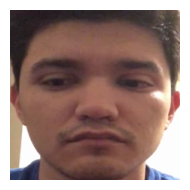

In [21]:
#Loading random  Images
image=keras.utils.load_img('/content/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Drowsy/I0498.png')
image=np.array(image)
h,w,c=image.shape
image_batch=image.reshape((1,h,w,c))
keras_cv.visualization.plot_image_gallery(image_batch,value_range=(0,255),rows=1,cols=1,show=True)

In [22]:
probs=model.predict(image_batch)

1/1 [==============================] - 4s 4s/step


In [32]:
classes=probs[0].argsort(axis=-1)
classes

array([1, 0])